In [1]:
from keras.layers import Dense, Input, Lambda
from keras.optimizers import adam
from keras.losses import mse
from keras.datasets import mnist, fashion_mnist
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
def process(arr):
    arr = arr.reshape((arr.shape[0], arr.shape[1] * arr.shape[2]))
    arr = arr.astype('float32') / arr.max()
    return arr

x_train = process(x_train)
x_test = process(x_test)

In [4]:
input_shape = (x_train.shape[1], )
inter_dim = 896
latent_vars = 3
batch_size = 100
epochs = 20

In [5]:
inputs = Input(shape=input_shape)
x = Dense(inter_dim, activation="relu")(inputs)
z_mean = Dense(latent_vars, activation="relu")(x)
z_log_sigma = Dense(latent_vars, activation="relu")(x)

In [6]:
def sample(args):
    z_mean, z_log_sigma = args
    return z_mean + z_log_sigma * 0

latent_space = Lambda(sample)([z_mean, z_log_sigma])

In [7]:
x = Dense(inter_dim, activation="relu")(latent_space)
out = Dense(input_shape[0], activation="sigmoid")(x)

In [8]:
ae = Model(inputs, out)

encoder = Model(inputs, z_mean)

In [9]:
ae.compile(optimizer="adam", loss="mse", metrics=['mae', 'acc'])
ae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 896)          703360      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 3)            2691        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 3)            2691        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [10]:
ae.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_test, x_test)
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0410 - mean_absolute_error: 0.1249 - acc: 0.0089 - val_loss: 0.0277 - val_mean_absolute_error: 0.0963 - val_acc: 0.0102
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0264 - mean_absolute_error: 0.0924 - acc: 0.0113 - val_loss: 0.0254 - val_mean_absolute_error: 0.0907 - val_acc: 0.0127
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0247 - mean_absolute_error: 0.0881 - acc: 0.0125 - val_loss: 0.0242 - val_mean_absolute_error: 0.0866 - val_acc: 0.0144
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0237 - mean_absolute_error: 0.0855 - acc: 0.0148 - val_loss: 0.0235 - val_mean_absolute_error: 0.0848 - val_acc: 0.0142
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0232 - mean_absolute_error: 0.0838 - acc: 0.0155 - val_loss: 0.02

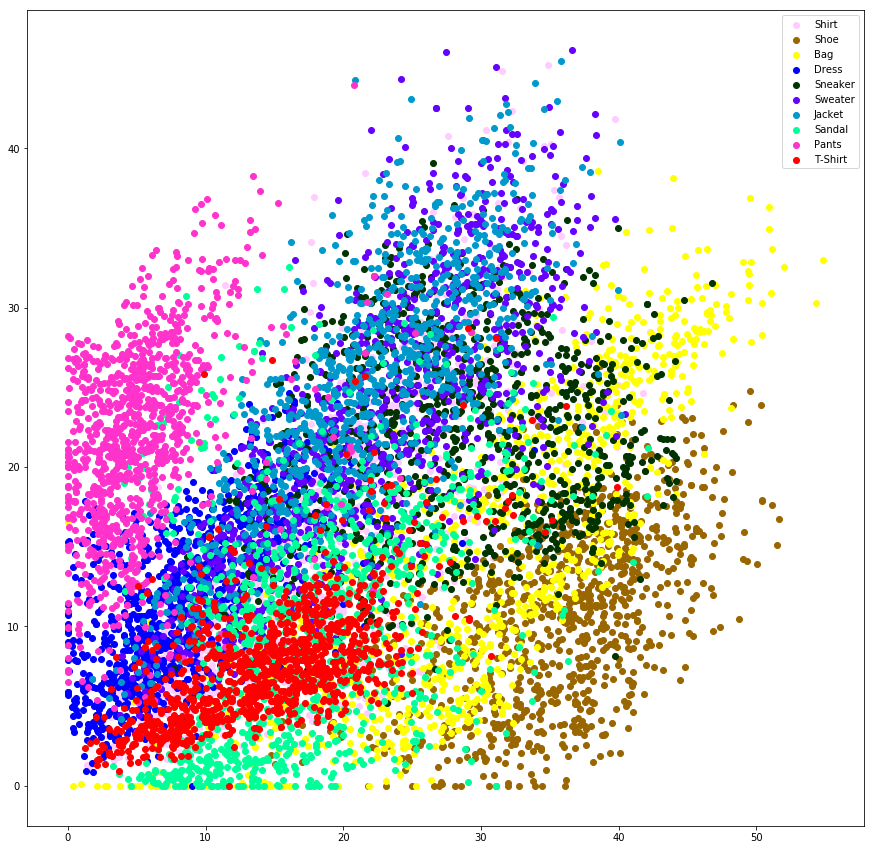

In [11]:
class_map_fashion = {
    0: "T-Shirt",
    1: "Pants",
    2: "Sweater",
    3: "Dress",
    4: "Jacket",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Shoe"
}

class_map_numbers = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

class_map = class_map_fashion

index_map = {
    class_map[0]: [],
    class_map[1]: [],
    class_map[2]: [],
    class_map[3]: [],
    class_map[4]: [],
    class_map[5]: [],
    class_map[6]: [],
    class_map[7]: [],
    class_map[8]: [],
    class_map[9]: []
}

color_map = {
    class_map[0]: "#ff0000",
    class_map[1]: "#ff33cc",
    class_map[2]: "#6600ff",
    class_map[3]: "#0000ff",
    class_map[4]: "#0099cc",
    class_map[5]: "#00ff99",
    class_map[6]: "#ffccff",
    class_map[7]: "#003300",
    class_map[8]: "#ffff00",
    class_map[9]: "#996600"
}

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
for index, i in enumerate(y_test):
    elem_class = class_map[i]
    elem_list = index_map[elem_class]
    elem_list.append(index)

fig, ax = plt.subplots(figsize=(15, 15))
for elem_class in index_map:
    elems = np.array([x_test_encoded[i] for i in index_map[elem_class]])
    ax.scatter(elems[:, 0], elems[:, 1], c=color_map[elem_class], label=elem_class)
    
ax.legend()
plt.show()

In [17]:
test = 11
img = x_test[test]
print(img.shape)

(784,)


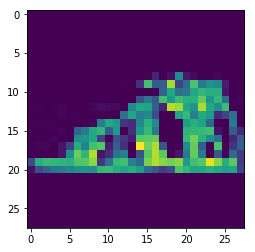

In [18]:
plt.imshow(img.reshape(28, 28))

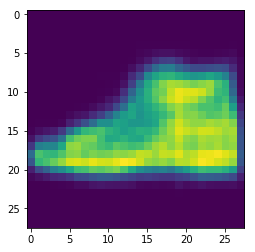

In [19]:
pred = ae.predict(img.reshape(1, 784))
plt.imshow(pred.reshape(28, 28))